In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacepy import pycdf
from datetime import datetime, timedelta
import os
import re

## Load datasets

In [2]:
datasets = {}
for filename in os.listdir('data'):
    location = re.findall(r'thg_l[12]_[\w]{3}_([\w]{4})_', filename)[0]
    datasets[location] = pycdf.CDF('data/' + filename)
    print(filename)

thg_l2_mag_gako_20080210_v01.cdf
thg_l2_mag_rank_20080210_v01.cdf
thg_l2_mag_pina_20080210_v01.cdf
thg_l2_mag_inuv_20080210_v01.cdf
thg_l2_mag_kapu_20080210_v01.cdf
thg_l2_mag_kuuj_20080210_v01.cdf
thg_l2_mag_tpas_20080210_v01.cdf
thg_l2_mag_fykn_20080210_v01.cdf
thg_l2_mag_fsmi_20080210_v01.cdf
thg_l2_mag_fsim_20080210_v01.cdf
thg_l2_mag_snkq_20080210_v01.cdf
thg_l2_mag_chbg_20080210_v01.cdf
thg_l2_mag_whit_20080210_v01.cdf
thg_l2_mag_gill_20080210_v01.cdf
thg_l2_mag_kian_20080210_v01.cdf
thg_l2_mag_pgeo_20080210_v01.cdf
thg_l2_mag_atha_20080210_v01.cdf
thg_l2_mag_mcgr_20080210_v01.cdf


In [3]:
t = np.arange(datetime(2008, 2, 10, 0, 0, 0), datetime(2008, 2, 11, 0, 0, 0), timedelta(seconds=0.5)).astype(datetime)
start = np.where(t == datetime(2008, 2, 10, 5, 0, 0))[0][0]
end = np.where(t == datetime(2008, 2, 10, 6, 0, 0))[0][0]

t_morning = t[start:end]

In [2]:
def plot_magnetometer(location):
    mag = datasets[location]['thg_mag_' + location][:]
    
    # centered around daily median for each component
    mag_centered = mag - np.nanmedian(mag, axis=0)
    
    # obtain 5:00 to 6:00
    mag_morning = mag_centered[start:end]
    
    # plot magnetometer
    plt.figure(figsize=(17, 5))
    plt.plot(t_morning, mag_morning)
    plt.xlabel('time')
    plt.ylabel('magnetometer (nT)')
    plt.ylim([-500, 500])
    plt.title(location)
    plt.legend(['H (Horizontal)', 'D (Declination)', 'Z (Vertically Down)'])
    plt.show()

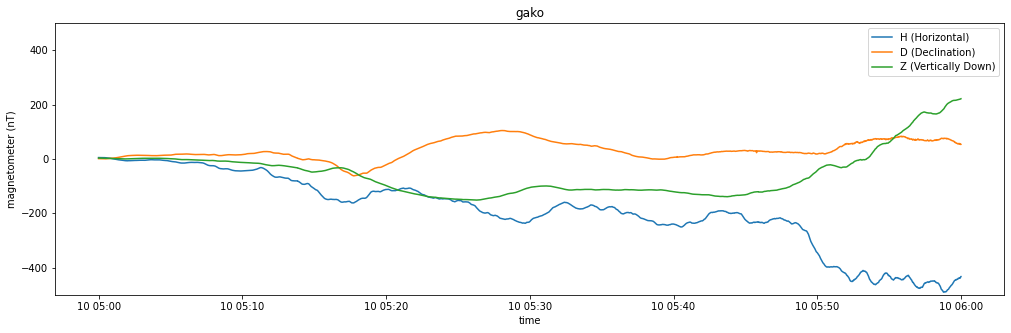

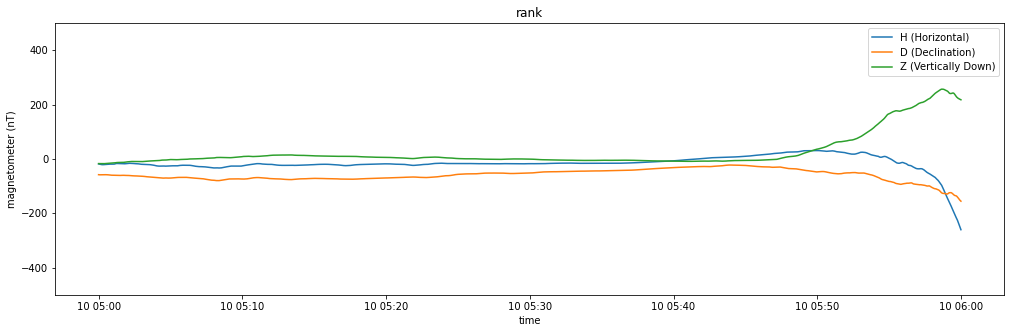

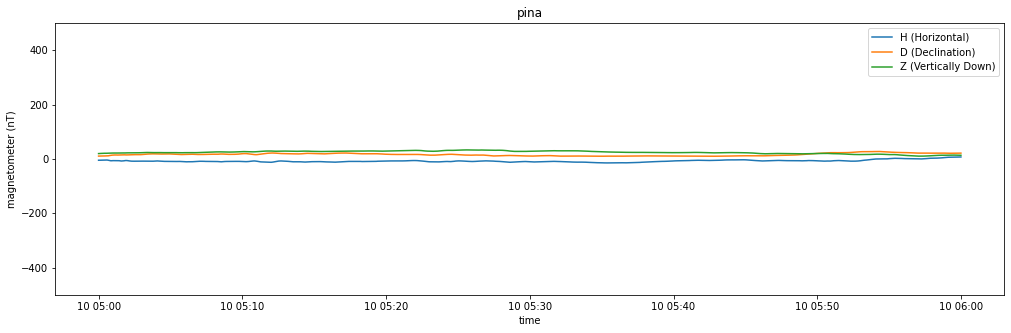

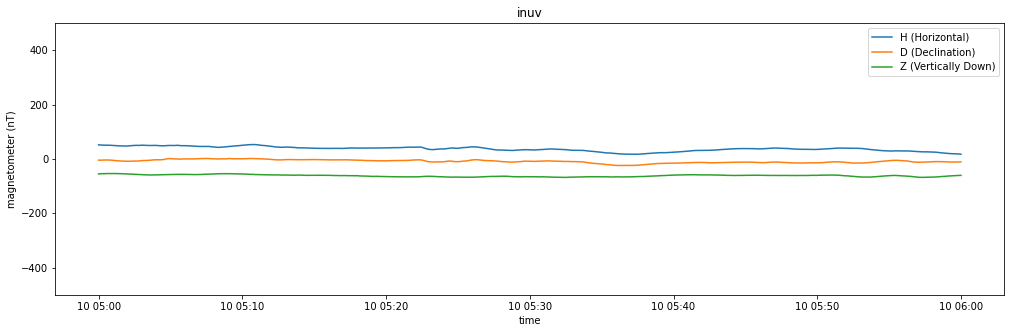

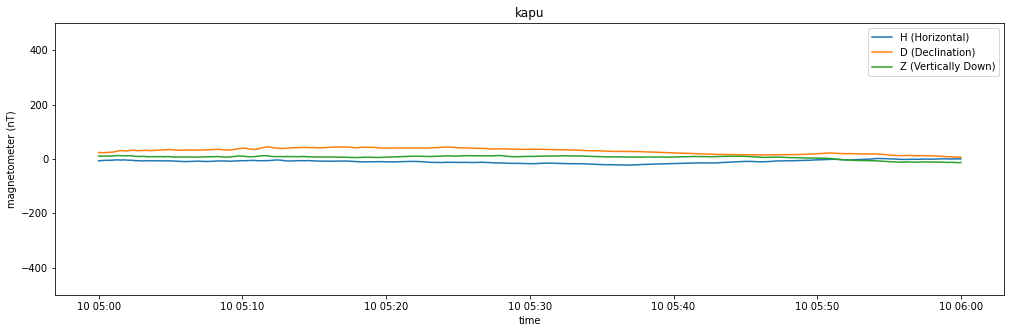

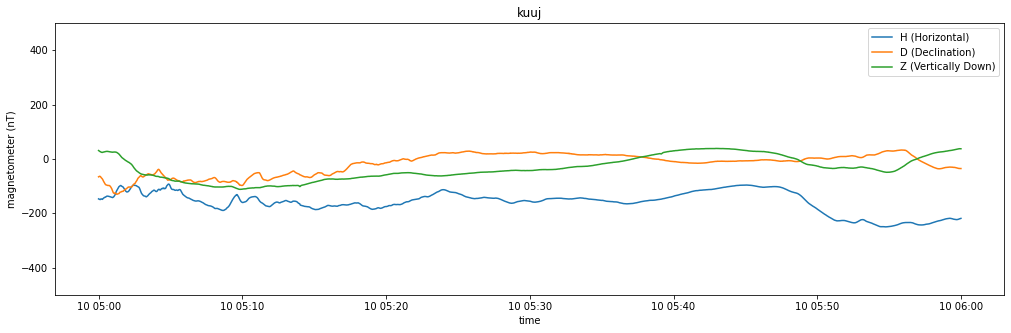

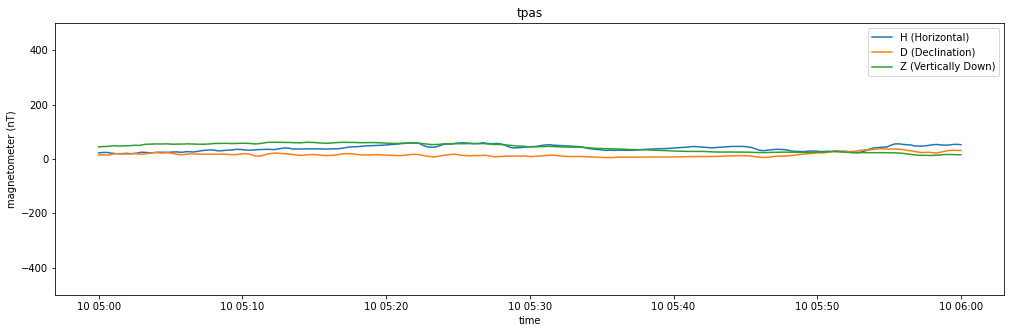

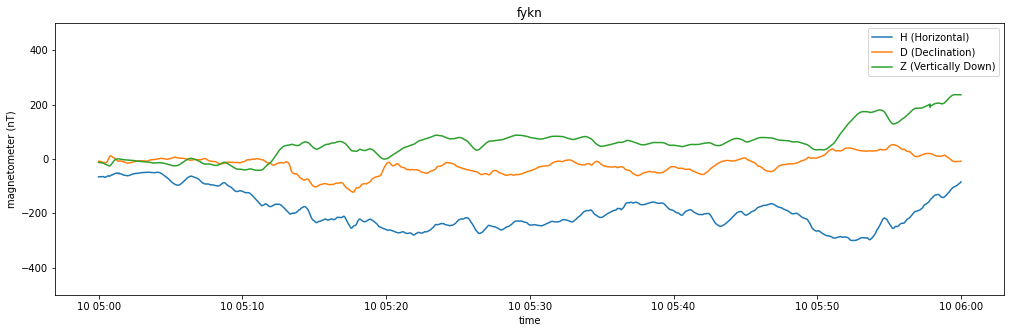

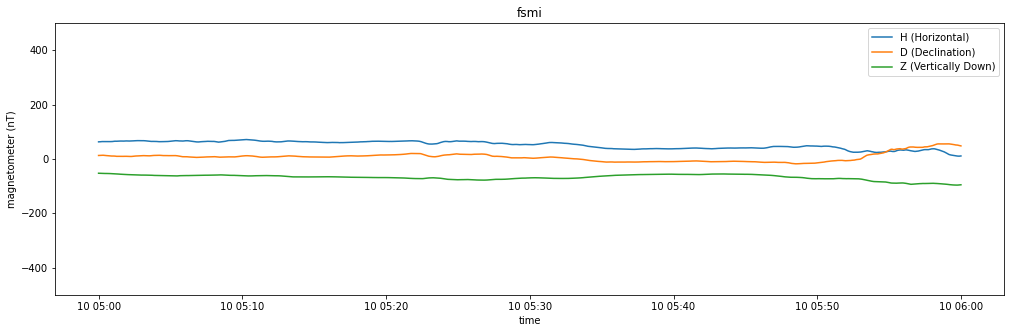

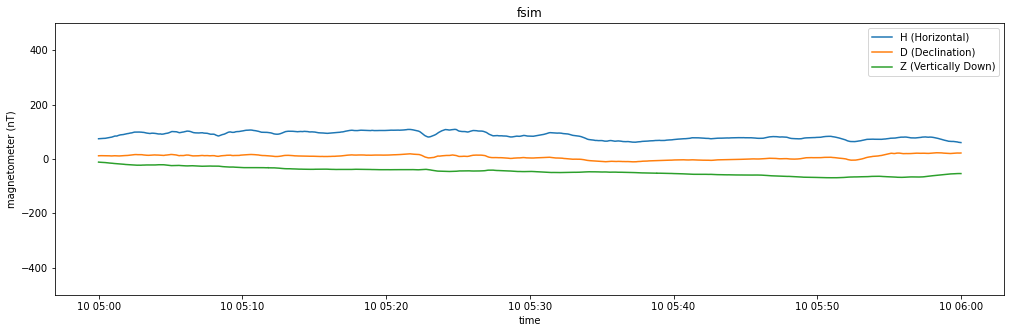

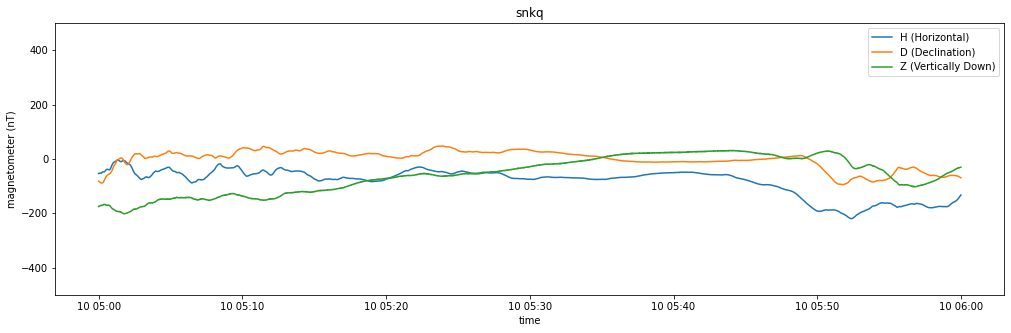

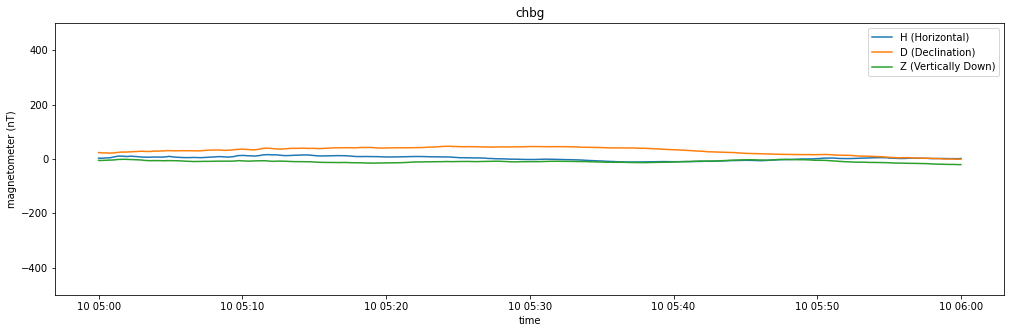

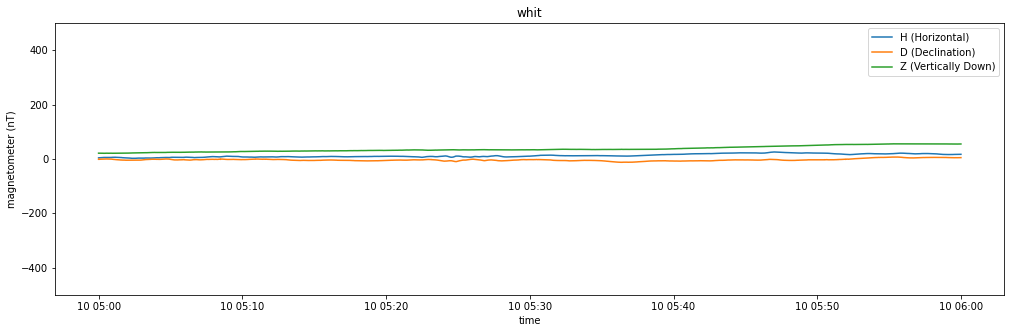

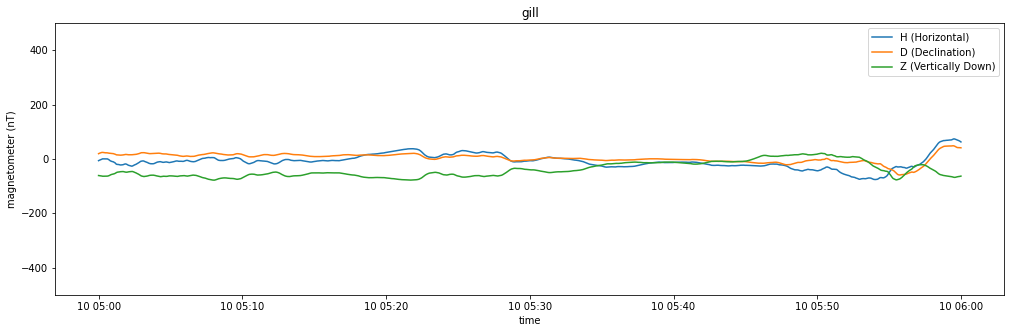

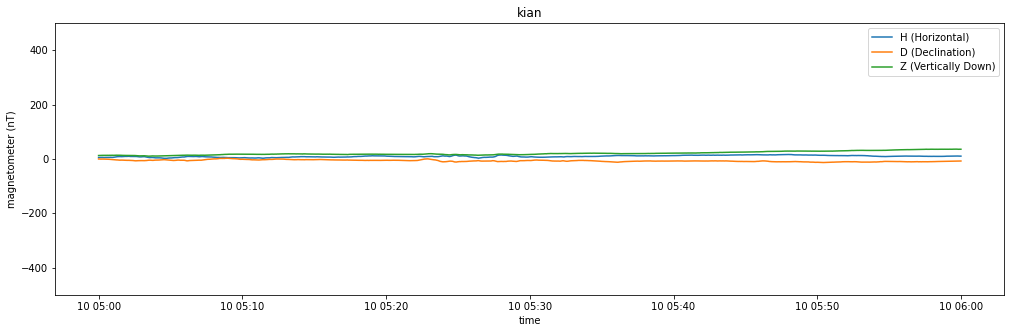

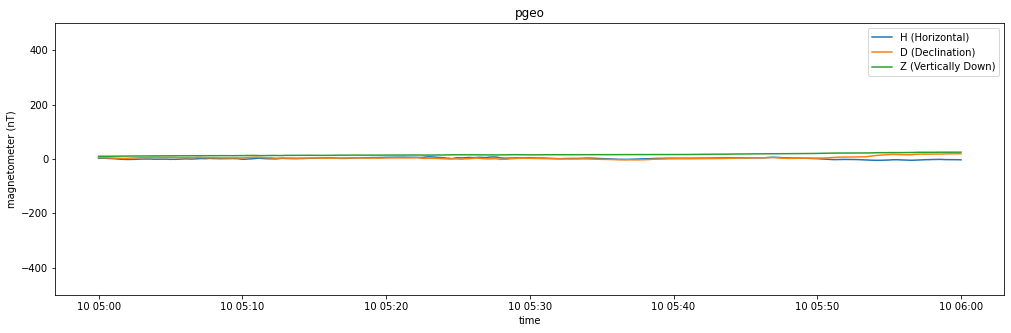

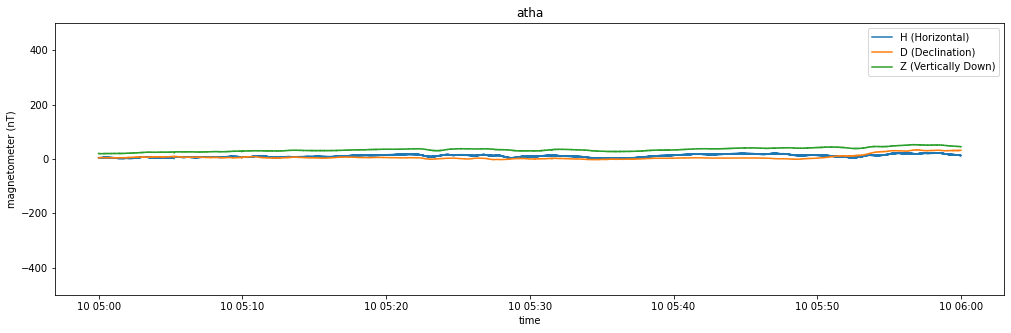

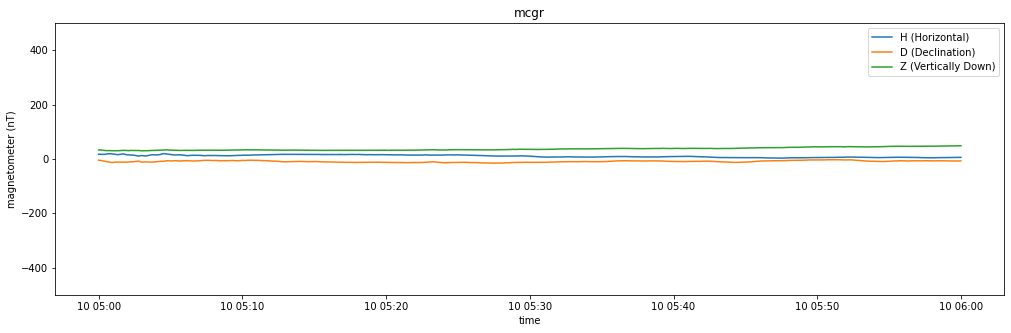

In [9]:
for loc in datasets.keys():
    plot_magnetometer(loc)

## Result

Substorms occurs after sudden decline in horizontal component

**location with substorms:**
- gako - 5:45
- rank - 5:55
- kuuj - 5:45
- fykn - 5:45 (also 5:05? not steep enough?)
- snkq - 5:40
- gill - 5:55 (steep rising not decline)